In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [9]:
# Zelle 2: Daten laden
# Annahme: Die CSV-Datei befindet sich im gleichen Verzeichnis wie das Notebook
# Falls nicht, passen Sie den Pfad entsprechend an
steam_data = pd.read_csv('steam_games.csv')

# Überblick über den Datensatz
print(f"Anzahl der Einträge: {len(steam_data)}")
print(f"Anzahl der Spalten: {len(steam_data.columns)}")
print("\nSpaltennamen:")
print(steam_data.columns.tolist())

Anzahl der Einträge: 40833
Anzahl der Spalten: 20

Spaltennamen:
['url', 'types', 'name', 'desc_snippet', 'recent_reviews', 'all_reviews', 'release_date', 'developer', 'publisher', 'popular_tags', 'game_details', 'languages', 'achievements', 'genre', 'game_description', 'mature_content', 'minimum_requirements', 'recommended_requirements', 'original_price', 'discount_price']


In [10]:
# Zelle 3: Erste Zeilen des Datensatzes anzeigen
steam_data.head()

,url,types,name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price,discount_price
0,https://store.steampowered.com/app/379720/DOOM/,app,DOOM,Now includes all three premium DLC packs (Unto...,"Very Positive,(554),- 89% of the 554 user revi...","Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",54.0,Action,"About This Game Developed by id software, the...",NaN,"Minimum:,OS:,Windows 7/8.1/10 (64-bit versions...","Recommended:,OS:,Windows 7/8.1/10 (64-bit vers...",$19.99,$14.99
1,https://store.steampowered.com/app/578080/PLAY...,app,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,"Mixed,(6,214),- 49% of the 6,214 user reviews ...","Mixed,(836,608),- 49% of the 836,608 user revi...","Dec 21, 2017",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...",37.0,"Action,Adventure,Massively Multiplayer",About This Game PLAYERUNKNOWN'S BATTLEGROUND...,Mature Content Description The developers de...,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$29.99,NaN
2,https://store.steampowered.com/app/637090/BATT...,app,BATTLETECH,Take command of your own mercenary outfit of '...,"Mixed,(166),- 54% of the 166 user reviews in t...","Mostly Positive,(7,030),- 71% of the 7,030 use...","Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian",128.0,"Action,Adventure,Strategy",About This Game From original BATTLETECH/Mec...,NaN,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$39.99,NaN
3,https://store.steampowered.com/app/221100/DayZ/,app,DayZ,The post-soviet country of Chernarus is struck...,"Mixed,(932),- 57% of the 932 user reviews in t...","Mixed,(167,115),- 61% of the 167,115 user revi...","Dec 13, 2018",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...",NaN,"Action,Adventure,Massively Multiplayer",About This Game The post-soviet country of Ch...,NaN,"Minimum:,OS:,Windows 7/8.1 64-bit,Processor:,I...","Recommended:,OS:,Windows 10 64-bit,Processor:,...",$44.99,NaN
4,https://store.steampowered.com/app/8500/EVE_On...,app,EVE Online,EVE Online is a community-driven spaceship MMO...,"Mixed,(287),- 54% of the 287 user reviews in t...","Mostly Positive,(11,481),- 74% of the 11,481 u...","May 6, 2003",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French",NaN,"Action,Free to Play,Massively Multiplayer,RPG,...",About This Game,NaN,"Minimum:,OS:,Windows 7,Processor:,Intel Dual C...","Recommended:,OS:,Windows 10,Processor:,Intel i...",Free,NaN


In [11]:
# Zelle 4: Datenstruktur analysieren
# Informationen zu Datentypen und fehlenden Werten
print("Informationen zur Datenstruktur:")
steam_data.info()

Informationen zur Datenstruktur:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40833 entries, 0 to 40832
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   url                       40833 non-null  object 
 1   types                     40831 non-null  object 
 2   name                      40817 non-null  object 
 3   desc_snippet              27612 non-null  object 
 4   recent_reviews            2706 non-null   object 
 5   all_reviews               28470 non-null  object 
 6   release_date              37654 non-null  object 
 7   developer                 40490 non-null  object 
 8   publisher                 35733 non-null  object 
 9   popular_tags              37888 non-null  object 
 10  game_details              40313 non-null  object 
 11  languages                 40797 non-null  object 
 12  achievements              12194 non-null  float64
 13  genre                     40

In [12]:
# Zelle 5: Prüfen auf fehlende Werte
print("\nFehlende Werte pro Spalte:")
missing_values = steam_data.isnull().sum()
print(missing_values[missing_values > 0])  # Zeigt nur Spalten mit fehlenden Werten


Fehlende Werte pro Spalte:
types                           2
name                           16
desc_snippet                13221
recent_reviews              38127
all_reviews                 12363
release_date                 3179
developer                     343
publisher                    5100
popular_tags                 2945
game_details                  520
languages                      36
achievements                28639
genre                         438
game_description             2913
mature_content              37936
minimum_requirements        19764
recommended_requirements    19758
original_price               5311
discount_price              26290
dtype: int64


In [13]:
# Zelle 6: Grundlegende Statistiken
print("\nStatistische Übersicht der numerischen Spalten:")
steam_data.describe()


Statistische Übersicht der numerischen Spalten:


,achievements
count,12194.000000
mean,77.237494
std,448.501848
min,1.000000
25%,12.000000
50%,21.000000
75%,38.000000
max,9821.000000


In [19]:
# Zelle 7: Datenbereinigung und -vorbereitung
# Datumsformat konvertieren
steam_data['release_date'] = pd.to_datetime(steam_data['release_date'], errors='coerce')

# Preisbereinigung - robustere Methode
def clean_price(price_value):
    if isinstance(price_value, (int, float)):
        return price_value
    
    if pd.isna(price_value):
        return 0
        
    # Wenn "Free" enthalten ist
    if isinstance(price_value, str) and ('free' in price_value.lower() or price_value.strip() == ''):
        return 0
        
    # Versuchen, Währungszeichen zu entfernen und in Float umzuwandeln
    if isinstance(price_value, str):
        price_str = price_value.replace('$', '').replace('€', '').replace(',', '.').strip()
        try:
            return float(price_str)
        except ValueError:
            print(f"Konnte '{price_value}' nicht umwandeln")
            return 0
    
    return 0

# Original-Preis bereinigen
steam_data['original_price'] = steam_data['original_price'].apply(clean_price)

# Rabatt-Preis bereinigen
steam_data['discount_price'] = steam_data['discount_price'].fillna(steam_data['original_price'])
steam_data['discount_price'] = steam_data['discount_price'].apply(clean_price)

# Rabatt in Prozent berechnen
steam_data['discount_percentage'] = np.where(
    steam_data['original_price'] > 0,
    ((steam_data['original_price'] - steam_data['discount_price']) / steam_data['original_price']) * 100,
    0
)

# Erscheinungsjahr extrahieren
steam_data['release_year'] = steam_data['release_date'].dt.year

# Primäres Genre extrahieren
steam_data['primary_genre'] = steam_data['genre'].str.split(',').str[0]

# Überprüfen der Ergebnisse
print("Datentyp original_price:", steam_data['original_price'].dtype)
print("Datentyp discount_price:", steam_data['discount_price'].dtype)

Datentyp original_price: float64
Datentyp discount_price: float64


In [20]:
# Zelle: 8 Überprüfen der bereinigten Daten
print("Überprüfung der bereinigten Daten:")
print(steam_data[['original_price', 'discount_price', 'discount_percentage', 'release_year', 'primary_genre']].head())


Überprüfung der bereinigten Daten:
   original_price  discount_price  discount_percentage  release_year  \
0           19.99           14.99            25.012506        2016.0   
1           29.99           29.99             0.000000           NaN   
2           39.99           39.99             0.000000           NaN   
3           44.99           44.99             0.000000           NaN   
4            0.00            0.00             0.000000        2003.0   

  primary_genre  
0        Action  
1        Action  
2        Action  
3        Action  
4        Action  


In [21]:
# Zelle 9: Analyse des Vorhersageziels
prediction_target = 'original_price'
print(f"Gewähltes Vorhersageziel: {prediction_target}")

# Statistiken zum Zielfeld anzeigen
print("\nStatistiken zum Vorhersageziel:")
print(steam_data[prediction_target].describe())

Gewähltes Vorhersageziel: original_price

Statistiken zum Vorhersageziel:
count     40833.000000
mean         46.098904
std        4841.391564
min           0.000000
25%           0.990000
50%           4.990000
75%           9.990000
max      730640.000000
Name: original_price, dtype: float64


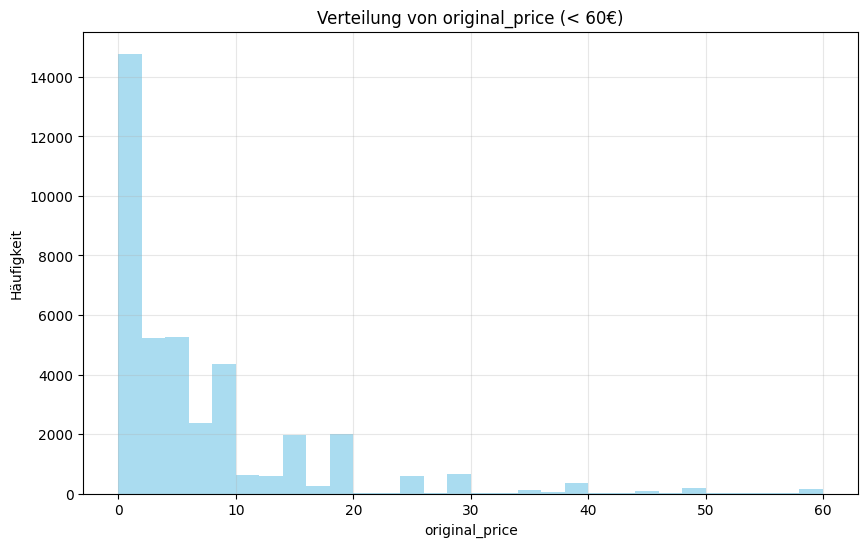

In [23]:
# Zelle 10: Verteilung mit Fokus auf niedrigere Preise 
plt.figure(figsize=(10, 6))
plt.hist(steam_data[steam_data[prediction_target] < 60][prediction_target], bins=30, color='skyblue', alpha=0.7)
plt.title(f'Verteilung von {prediction_target} (< 60€)')
plt.xlabel(prediction_target)
plt.ylabel('Häufigkeit')
plt.grid(alpha=0.3)
plt.show()

In [24]:
# Zelle 11: Korrelationen mit dem Vorhersageziel untersuchen
# Numerische Spalten auswählen
numeric_columns = steam_data.select_dtypes(include=[np.number]).columns.tolist()
correlations = steam_data[numeric_columns].corr()[prediction_target].sort_values(ascending=False)
print("Korrelationen mit dem Vorhersageziel:")
print(correlations)


Korrelationen mit dem Vorhersageziel:
original_price         1.000000
discount_price         0.999910
achievements           0.002918
discount_percentage    0.000950
release_year          -0.006256
Name: original_price, dtype: float64


In [25]:
# Zelle 12
print("\n2.2 Statistische Informationen für ausgewählte Felder:")

# Funktion für die Berechnung statistischer Kennzahlen
def get_statistics(df, column_name):
    """Berechnet statistische Kennzahlen für eine Spalte."""
    data = df[column_name].dropna()
    
    if pd.api.types.is_numeric_dtype(data):
        stats = {
            'Mittelwert': data.mean(),
            'Median': data.median(),
            'Standardabweichung': data.std(),
            'Minimum': data.min(),
            'Maximum': data.max(),
            '25%-Quartil': data.quantile(0.25),
            '75%-Quartil': data.quantile(0.75)
        }
    else:
        stats = {
            'Eindeutige Werte': data.nunique(),
            'Häufigster Wert': data.mode().iloc[0] if not data.empty else None,
            'Häufigkeit des häufigsten Werts': data.value_counts().iloc[0] if not data.empty else 0
        }
    
    return stats

# Wichtige Felder auswählen
important_fields = ['original_price', 'discount_price', 'release_year', 'primary_genre']

# Statistiken für jedes Feld berechnen
for field in important_fields:
    print(f"\nStatistiken für '{field}':")
    stats = get_statistics(steam_data, field)
    for name, value in stats.items():
        print(f"{name}: {value}")


2.2 Statistische Informationen für ausgewählte Felder:

Statistiken für 'original_price':
Mittelwert: 46.09890382778635
Median: 4.99
Standardabweichung: 4841.391563831946
Minimum: 0.0
Maximum: 730640.0
25%-Quartil: 0.99
75%-Quartil: 9.99

Statistiken für 'discount_price':
Mittelwert: 55.368321700585305
Median: 6.99
Standardabweichung: 4841.498323944583
Minimum: 0.0
Maximum: 730640.0
25%-Quartil: 1.99
75%-Quartil: 19.71

Statistiken für 'release_year':
Mittelwert: 2016.7716368053448
Median: 2018.0
Standardabweichung: 2.796471418226627
Minimum: 1986.0
Maximum: 2020.0
25%-Quartil: 2016.0
75%-Quartil: 2019.0

Statistiken für 'primary_genre':
Eindeutige Werte: 31
Häufigster Wert: Action
Häufigkeit des häufigsten Werts: 16290


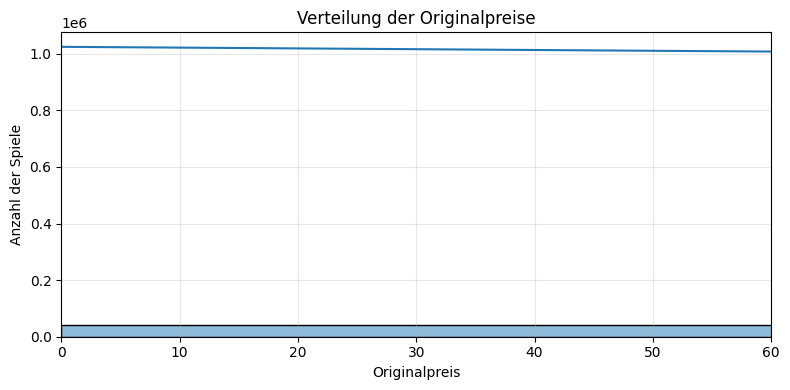

In [32]:
# Zelle 13: Histogramm für den Originalpreis - kompakter
plt.figure(figsize=(8, 4))
sns.histplot(data=steam_data, x='original_price', bins=20, kde=True)
plt.title('Verteilung der Originalpreise')
plt.xlabel('Originalpreis')
plt.ylabel('Anzahl der Spiele')
plt.xlim(0, 60)  # Begrenzt die x-Achse für bessere Sichtbarkeit
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

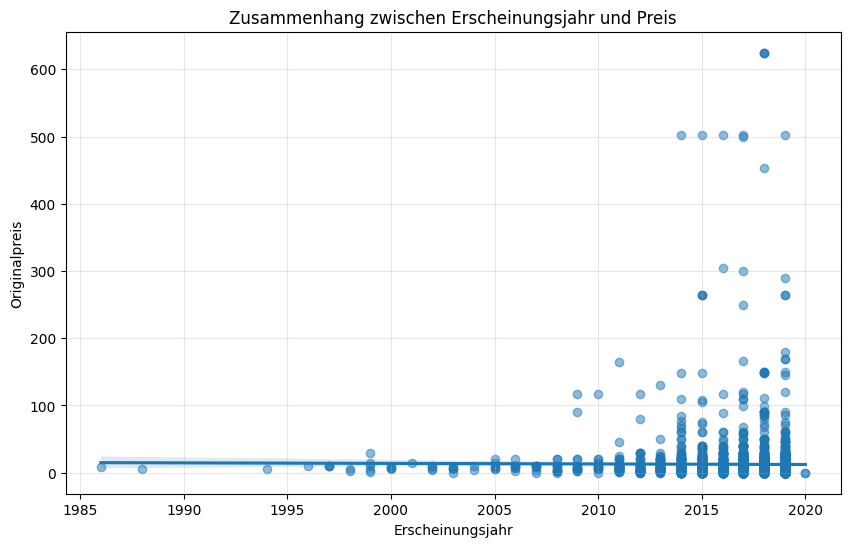

In [27]:
# Zelle 14: Regressionsplot - Zusammenhang zwischen Erscheinungsjahr und Preis
plt.figure(figsize=(10, 6))
sns.regplot(x='release_year', y='original_price', 
            data=steam_data.dropna(subset=['release_year', 'original_price']), 
            scatter_kws={'alpha': 0.5})
plt.title('Zusammenhang zwischen Erscheinungsjahr und Preis')
plt.xlabel('Erscheinungsjahr')
plt.ylabel('Originalpreis')
plt.grid(alpha=0.3)
plt.show()

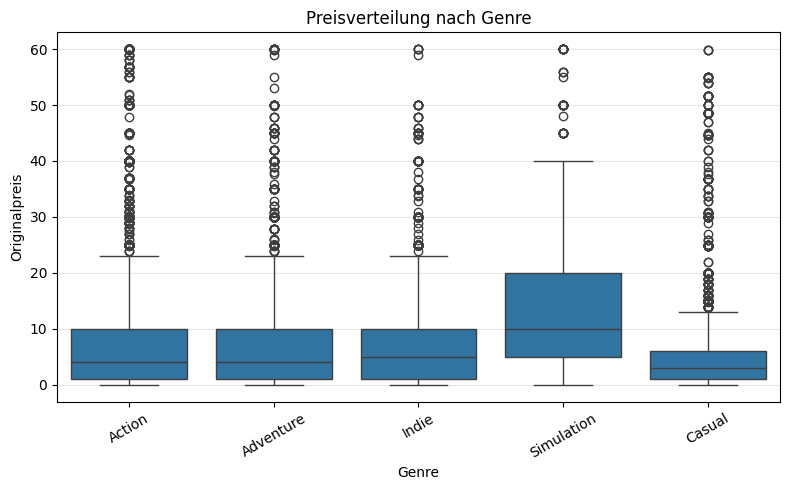

In [33]:
# Zelle 15: Boxplot - kompakter und mit Auswahl der häufigsten Genres
# Top-5 Genres für mehr Übersichtlichkeit
top_genres = steam_data['primary_genre'].value_counts().nlargest(5).index

plt.figure(figsize=(8, 5))
sns.boxplot(x='primary_genre', y='original_price', 
            data=steam_data[(steam_data['primary_genre'].isin(top_genres)) & 
                           (steam_data['original_price'] < 60)])
plt.title('Preisverteilung nach Genre')
plt.xlabel('Genre')
plt.ylabel('Originalpreis')
plt.xticks(rotation=30)
plt.grid(alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

In [29]:
# Zelle 16: Analyse der Notwendigkeit einer Skalierung
print("\n2.4 Analyse der Notwendigkeit einer Skalierung:")

# Originalverteilung anzeigen
print("Statistiken vor der Skalierung:")
print(steam_data['original_price'].describe())

# Daten skalieren
scaler = StandardScaler()
price_data = steam_data['original_price'].dropna().values.reshape(-1, 1)
scaled_price = scaler.fit_transform(price_data)

# Statistiken nach Skalierung
print("\nStatistiken nach der Skalierung:")
print(f"Mittelwert: {scaled_price.mean():.4f}")
print(f"Standardabweichung: {scaled_price.std():.4f}")



2.4 Analyse der Notwendigkeit einer Skalierung:
Statistiken vor der Skalierung:
count     40833.000000
mean         46.098904
std        4841.391564
min           0.000000
25%           0.990000
50%           4.990000
75%           9.990000
max      730640.000000
Name: original_price, dtype: float64

Statistiken nach der Skalierung:
Mittelwert: 0.0000
Standardabweichung: 1.0000
